In [7]:
import sys
import pandas as pd
sys.path.insert(0,'G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Modules/')
from startup_g import *

In [13]:
df_p = process_import()
df_a = auth_import()

Looking for local copy of Process data...
Process data fetched locally in 0:01:09.160749
Looking for local copy of Auth data...
Auth data fetched locally in 0:00:20.344108


In [6]:
from test import adding

ImportError: cannot import name 'adding' from 'test' (G:\Programs\Anaconda\envs\det\lib\test\__init__.py)

In [2]:
adding()

NameError: name 'adding' is not defined

In [23]:
adding()

4

In [17]:
print(df_p.head())
print(df_a.head())

AttributeError: 'NoneType' object has no attribute 'head'

NoneType

In [89]:
x = ["UserName","Device"]
counts_p_reduced = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    z = z[z["Count"] > 1]
    z = z[z["Count"] < z["Count"][0]]
    counts_p_reduced.append(z)

In [87]:
x = ["UserName","Device"]
counts_p_mid_80 = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    l = len(z)
    l_low = 
    l_high =
    z = z[z["Count"] > ]
    z = z[z["Count"] < ]
    counts_p_mid_80.append(z)

255382

In [160]:
x = ["UserName","Device"]
counts_p_mid_80 = []
counts_p_mid_80_discard = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    l = len(z)
    print(l)
    l_low = int(l*0.1)
    l_high = int(l*0.9)
    y = z[(z["Count"] <= z["Count"][l_low]) & (z["Count"] >= z["Count"][l_high])]
    x = z[z["Count"] > z["Count"][l_low]]
    v = z[z["Count"] < z["Count"][l_high]]
    counts_p_mid_80.append(y)
    temp = []
    temp.append(x)
    temp.append(v)
    b = pd.concat(temp,axis=0)
    counts_p_mid_80_discard.append(b)

25320
13476


In [164]:
print(len(counts_p_mid_80[0])+len(counts_p_mid_80_discard[0]))

25320


In [170]:
print("Process - UserName - First 5")
print(counts_p_mid_80[0].head())
print("")
print("Process - UserName - Last 5")
print(counts_p_mid_80[0].tail())
print("")
print("Process - Device - First 5")
print(counts_p_mid_80[1].head())
print("")
print("Process - Device - Last 5")
print(counts_p_mid_80[1].tail())

Process - UserName - First 5
         UserName  Count
2532  Comp459452$   4272
2533  Comp819519$   4272
2534   User202994   4272
2535  Comp509630$   4272
2536  Comp416250$   4272

Process - UserName - Last 5
          UserName  Count
22784  Comp324186$    121
22785   User781308    121
22786  Comp748227$    121
22787   User847942    121
22788   User520063    121

Process - Device - First 5
          Device  Count
1347  Comp412116   6584
1348  Comp878158   6584
1349  Comp702752   6584
1350  Comp543700   6582
1351  Comp815841   6582

Process - Device - Last 5
           Device  Count
12124  Comp504154   1092
12125  Comp514047   1090
12126  Comp793786   1089
12127  Comp595745   1089
12128  Comp852830   1087


<AxesSubplot:xlabel='Count'>

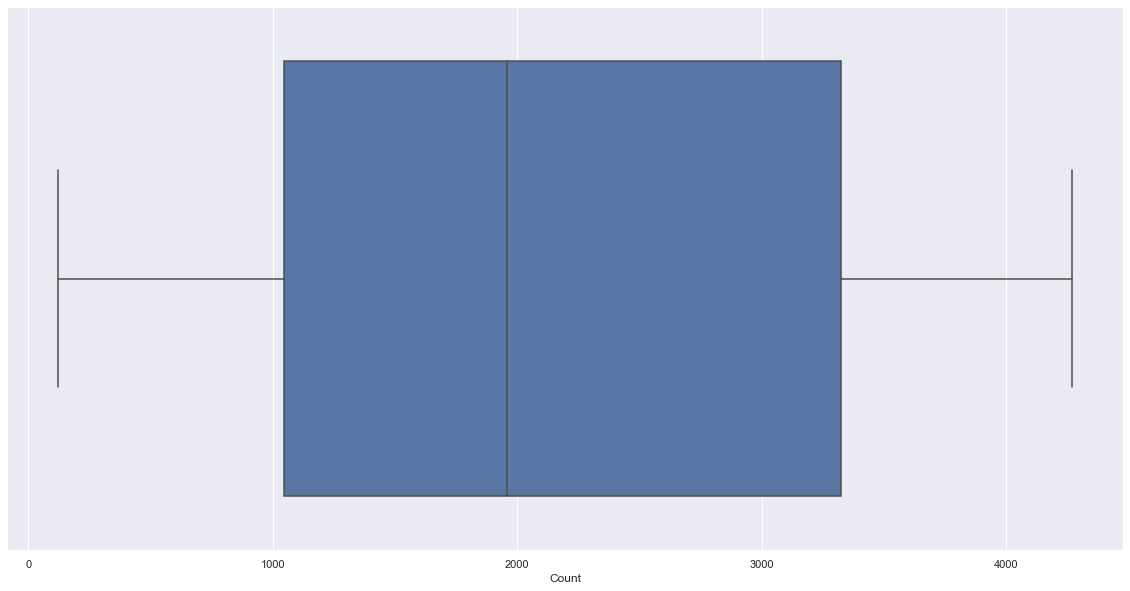

In [131]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p_mid_80[0]["Count"]:])

In [93]:
counts_p_mid_80[0]

Index(['UserName', 'Device', 'ProcessName', 'ParentProcessName', 'DailyCount'], dtype='object')